# 머신러닝
### 당뇨병 유무와 신체검사 데이터 


1. 데이터탐색
(1) 시각화 포함 탐새적 자료분석을 시행하시오.
(2) 이상치를 식별하고 처리하시오.
(3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

In [1]:
## 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies : 임신횟수 
Glucose	: 포도당
BloodPressure : 혈압	
SkinThickness : 피부두께	
Insulin 2시간 혈청 인슐린	
BMI : bmi	
DiabetesPedigreeFunction 당뇨병 혈통가능	
Age : 나이	
Outcome : 당뇨병 유무 1 당뇨 0 일반

(1) 시각화 포함 탐새적 자료분석을 시행하시오.
데이터를 확인해보면 Outcome을 제외하고 모두 수치 데이터이다.
outcome을 기준으로 groupby를 하여 수치평균 데이터를 확인해본다. 

In [2]:
group = df.groupby('Outcome').mean()
group

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


데이터의 평균을 확인해보면 당뇨병이 있는 사람은 평균 임신횟수, 평균 포도당, 평균 인슐린이 높다.
평균들을 시각화해본다.

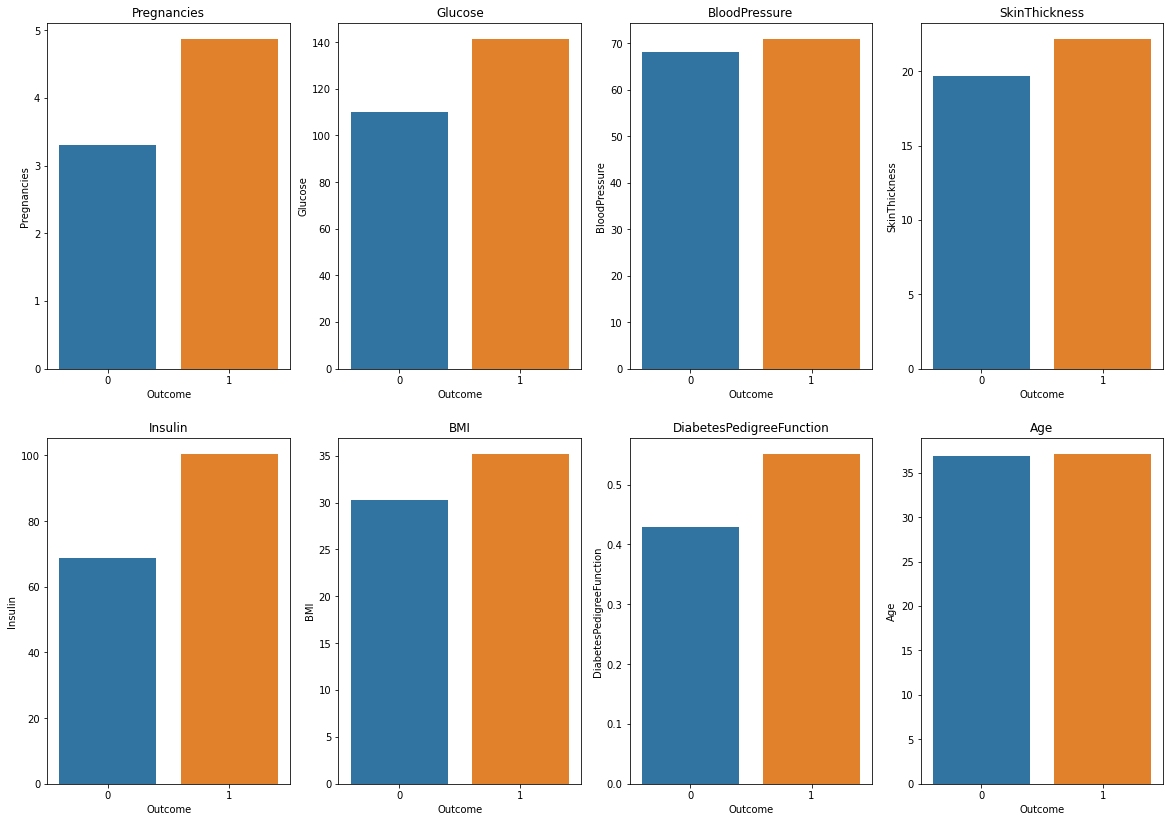

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
for i in range(4) :
    sns.barplot(group.index, group.iloc[:, i], ax= axes[0][i])
    axes[0][i].set_title(group.columns[i])
    
for i in range(4) :
    sns.barplot(group.index, group.iloc[:, i+4], ax= axes[1][i])
    axes[1][i].set_title(group.columns[i+4])

<AxesSubplot:>

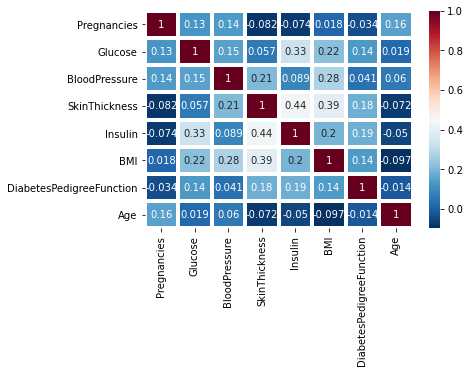

In [4]:
df_cor = df.drop(columns=['Outcome']).corr(method="pearson")
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
           cmap="RdBu_r",
           annot=True,
           linewidth=3)

상관관계를 확인해봤을 때에는 엄청 크게 관계를 가지는 변수가 없다.
즉 모든 변수를 활용해도 된다.

(2) 이상치를 식별하고 처리하시오.

위의 데이터를 범위를 확인해본다.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


count가 동일한 것을 보며 결측치는 존재하지 않지만 이상치는 존재한다.
혈압과 Glucose이 0인 것과 age가 많이 큰 것에 대한 이상치를 대체한다. 
이상치를 대체할 때에는 중앙값이나 평균값으로 대체한다. 

In [6]:
print("BloodPressure 중앙값: ", df.BloodPressure.median())
print("Age 중앙값: ", df.Age.median())
print("Glucose 중앙값: ", df.Glucose.median())

BloodPressure 중앙값:  72.0
Age 중앙값:  29.0
Glucose 중앙값:  117.0


In [7]:
outlier_index = df[df['BloodPressure'] == 0].index
df.loc[outlier_index, 'BloodPressure'] = df.BloodPressure.median()

outlier_index = df[df['Glucose'] == 0].index
df.loc[outlier_index, 'Glucose'] = df.Glucose.median()

outlier_index = df[df['Age'] >= 100].index
df.loc[outlier_index, 'Age'] = df.Age.median()

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.
각각 컬럼에 대한 scale이 많이 달라 범위를 맞춰줘야 할 것이다. 

2. 클래스 불균형 처리
(1) 업 샘플링 과정을 설명하고 결과를 작성하시오.
(2) 언더 샘플링 과정을 설명하고 결과를 작성하시오.

(1) 업 샘플링 과정을 설명하고 결과를 작성하시오.
오버 샘플링기법은 비중이 데이터를 추가로 생성 수를 늘려 데이터 불균형을 극복하는 방식이다.
소수의 데이터를 가진 데이터세트를 다수 레이블을 가진 데이터세트의 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다.
언더 샘플링은 데이터 손실의 문제로 인해 예측 성능이 저하되는 단점이 있으므로 일반적으로 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

Random Oversampling
- 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
- 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
- Random Oversampling은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만 사용방법이 간단하다는 장점이 있다.

SMOTE
- 적은 데이터세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
- Resampling방식보다 처리 속도가 느리다는 단점이 있지만 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에 과적합 문제를 예방할 수 있다는 장점이 있다. 

오버 샘플링을 고려할 때 주의할 것이 있다. 재현율과 정밀도이다.
양성데이터가 음성데이터보다 훨씬 부족한 데이터로 예를 들었을 때, 오버 샘플링을 하게 되면 양성으로 예측하는 비율이 높아지기 때문에 정밀도가 감소한다. 따라서 정밀도의 감소율을 낮추고 재현율의 증가율을 높이는 방법에 유의하며 SMOTE 패키지를 사용해야 한다. 

과적합 가능성이 있고 계산시간이 오래거리며 노이즈나 이상치에 민감하다. 
정보손실이 없다.
보통 언더샘플링보다 분류 정확도가 높다.

In [10]:
df['Outcome'].value_counts()
# 결과 분포

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

ros = RandomOverSampler()
x_upsampling, y_upsampling = ros.fit_resample(x, y)

smote = SMOTE()
x_upsampling_smote, y_upsampling_smote = smote.fit_resample(x, y)

print('기존 분포')
print(df['Outcome'].value_counts()/len(df))

print('업스케일 분포')
print(y_upsampling['Outcome'].value_counts()/len(y_upsampling))

print('업스케일 SMOTE 분포')
print(y_upsampling_smote['Outcome'].value_counts()/len(y_upsampling_smote))


ModuleNotFoundError: No module named 'imblearn'

(2) 언더 샘플링 과정을 설명하고 결과를 작성하시오.
Undersampling은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식이다.

RandomUnderSampler
- 소수 집단 데이터가 어느정도 확보되었다고 여겨질 때, 다수 집단의 데이터를 줄여 균형을 맞춘다. 언어 샘플링을 적용하면 다수 집단의 유의미한 정보를 손실할 수 있다는 단점이 있다. 

Tomek link
- 서로 다른 클래스가 있을 때 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수 클래스의 데이터를 제거한다.
- Tomek link는 다수 범주의 데이터의 중심 분포는 거의 유지하면서 분류 경계를 조정하는 효과를 얻기 때문에 random undersampling에 비해 정보의 유실을 크게 줄일 수 있지만, 제거되는 샘플이 한정적이기 때문에 큰 언더 샘플링의 효과를 얻을 수는 없다.

다수 범주 관측치 제거로 계산 시간 감소
데이터 제거로 인해 정보 손실 발생

In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_undersampling, y_undersampling = rus.fit_resample(x, y)

print('기존 분포')
print(df['Outcome'].value_counts()/len(df))

print('업스케일 분포')
print(y_undersampling['Outcome'].value_counts()/len(y_undersampling))


ModuleNotFoundError: No module named 'imblearn'

(3) 둘중 하나를 선택하고 선택한 이유를 서술하시오.
해당 데이터에는 oversampling이 적합하다. 데이터가 총 768개로 당뇨병 환자를 대표하기에는 너무 적은 data이다. Undersampling을 선택하게 되면 전체 데이터가 너무 적어지기 때문에 오버 피팅일 일어날 위험이 크므로 oversampling을 선택한다. 

3. 모델링
(1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.
(2) 모델을 비교하고 결과를 설명하시오.
(3) 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

(1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

해당 알고리즘은 분류알고리즘으로 1, 0 두개로 분류를 하는 것이다.
그래서 xgboostclassifier, logisticRegression, svm 세개를 선택한다.
xgboost는 성능, 속도는 logistic 기타는 svm으로 선택한다.

In [17]:
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
import sklearn.svm as svm

log = LogisticRegression()
xgb = XGBClassifier(ramdom_state=0)
svm_clf = svm.SVC(kernel='linear')

(2) 모델을 비교하고 결과를 설명하시오.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

kfold = KFold
def model_result(model) :
    pred_li=[]
    for train_idx, test_idx in kfold.split(x) :
        x_train, x_test = x.iloc[train_idx, :], x.ilic[test_idx,:]
        y_train, y_test = y.iloc[train_idx, :], y.ilic[test_idx,:]
        
        x_train_resample, y_train_resample = smote.fit_resample(x_train, y_train)
        
        start = time.time()
        model.fit(x_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(x_test)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f"{end- start:.5f} sec")
    print(np.mean(pred_li))
        

In [ ]:
model_result(log)

model_result(xgb)

model_result(svm_clf)

(3) 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

차원축소 : 피처가 많을수록 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다.선형 모델에서는 입력 변수간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능이 저하될 수 있다. 이로인해 차원 축소가 필요하다. 

PCA
- 기존 데이터의 정보유실을 최소하하며 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소한다. 
- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며 이렇게 분해된 고유벡터를 이용해 입력데이터를 선형으로 변환하는 방식 
- pca여러 속성이 값을 연산해야하므로 속성의 스케일에 영향을 받는다. 그래서 pca를 시행하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다. (스케일에 따라 각 주성분이 설명가능한 분산량이 달라질 수 있기 때문에)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=999)
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
pca = PCA(n_compoments=8)
x_train_pca = pca.fit(x_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())


NameError: name 'SMOTE' is not defined

5개 주성분이 전체의 81%를 설명할 수 있으니 이것을 가지고 모델링을 해본다. 

In [ ]:
def pca_model_result(model) :
    pred_li=[]
    for train_idx, test_idx in kfold.split(x) :
        x_train, x_test = x.iloc[train_idx, :], x.ilic[test_idx,:]
        y_train, y_test = y.iloc[train_idx, :], y.ilic[test_idx,:]
        
        x_train_resample, y_train_resample = smote.fit_resample(x_train, y_train)
        
        scaler = StandardScaler()
        x_train_res_s = scaler.fit_transform(x_train_resample)
        x_test_s = scaler.transform(x_test)
        
        pca = PCA(n_compoments=5)
        x_train_pca = pca.fit(x_train_res_s)
        x_test_pca = pca.transform(x_test_s)

        start = time.time()
        model.fit(x_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(x_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f"{end- start:.5f} sec")
    print(np.mean(pred_li))
        

In [ ]:
pca_model_result(log)

pca_model_result(xgb)

pca_model_result(svm_clf)